In [2]:
import sys
sys.path.append(r"../")
%matplotlib inline
from luna.pretrained_models import models
from luna.featurevis.transformations import *
from luna.featurevis import featurevis, images
import matplotlib.pyplot as plt
import imageio
import tensorflow as tf
import numpy as np
# tf.random.set_seed =123

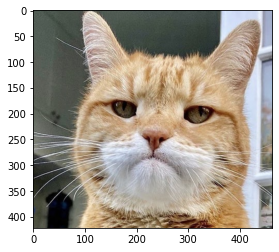

In [3]:
image = plt.imread("disappointed.png")
plt.imshow(image)


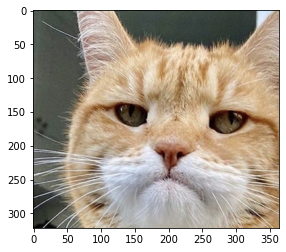

In [5]:
### jitter
image_jitter = jitter(image, 100, seed=42)
plt.imshow(image_jitter)

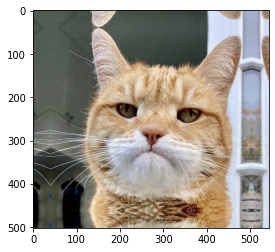

In [29]:
### pad
image_extend = np.expand_dims(image, axis=0)
image_pad = pad(image_extend, 40)
plt.imshow(image_pad[0])


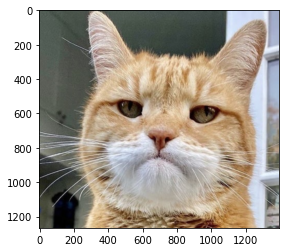

In [3]:
### scale
SCALE = 3
image_scale= bilinear_rescale(np.expand_dims(image, axis=0), [SCALE ** (n/10.) for n in range(-10, 11)], seed=42)
plt.imshow(image_scale[0])

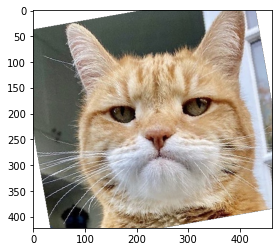

In [5]:
ROTATE = 10
image_rotate_extend = np.expand_dims(image, axis=0)
image_rotate = rotation(image_rotate_extend,range(-10,11), units="degrees", seed=42)
plt.imshow(image_rotate[0])

In [11]:
image = plt.imread("disappointed.png")
#plt.imshow(image)
image_extend = np.expand_dims(image, axis=0)

#<matplotlib.image.AxesImage at 0x2727ea1a5b0>

[0.24390243902439027, 0.28086299906798334, 0.3234244994063943, 0.37243569698889856, 0.42887396794673466, 0.49386479832479485, 0.5687042284055872, 0.6548846982078103, 0.7541248095677446, 0.8684035983157513, 1.0, 1.1515382961787317, 1.3260404475662166, 1.5269863576544838, 1.7583832685816119, 2.0248456731316584, 2.3316873364629074, 2.6850272626520213, 3.091911719227753, 3.56045475309458, 4.1]
tf.Tensor(2, shape=(), dtype=int32)
[-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tf.Tensor(13, shape=(), dtype=int32)


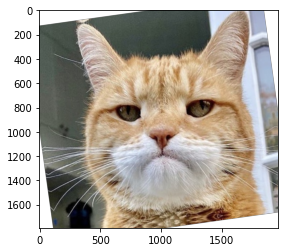

In [12]:
#### apply one round of standard transformation in a proposed order.
JITTER = 5
ROTATE = 12
SCALE  = 4.1
img = pad(image_extend, 2*JITTER)
img = jitter(img, JITTER, seed=42)
img = bilinear_rescale(img, [SCALE ** (n/10.) for n in range(-10, 11)])
img = rotation(img, range(-ROTATE,ROTATE), units="degrees", seed=42)
plt.imshow(img[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


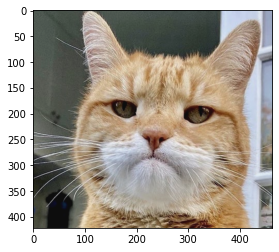

In [16]:
#### let's see what is coming out of Adam

opt = tf.keras.optimizers.Adam(learning_rate=0.05)
var = tf.Variable(image)
loss = lambda: (var ** 2)/2.0
step_count = opt.minimize(loss, [var]).numpy()
plt.imshow(var.numpy())


In [7]:
x = tf.Variable([1,2,3], dtype=tf.float32)
grad = tf.constant([0.1, 0.2, 0.3])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5, epsilon=1e-08)
optimizer.apply_gradients(zip([grad], [x]))
print(x)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.49998665, 1.4999859 , 2.4999857 ], dtype=float32)>


In [ ]:
# To use minimize you have to define your loss computation as a funcction
# def compute_loss():
#     log_x = tf.math.log(x)
#     y = tf.math.square(log_x)
#     return y
# train = opt.minimize(compute_loss, var_list=trainable_variables)